# Linear Regression


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

- Check GPU availabilty


In [2]:
import sys

import keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
gpu = len(tf.config.list_physical_devices("GPU")) > 0
if gpu:
    print("GPU is", "available" if gpu else "NOT AVAILABLE")
    print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))
    print("Physical GPUs: ", tf.config.list_physical_devices("GPU"))
    print("Logical GPUs: ", tf.config.list_logical_devices("GPU"))
print("Physical CPUs: ", tf.config.list_physical_devices("CPU"))
print("Logical CPUs: ", tf.config.list_logical_devices("CPU"))
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
tf.debugging.set_log_device_placement(True)

Python Platform: Linux-6.6.12-linuxkit-aarch64-with-glibc2.35
Tensor Flow Version: 2.14.0
Physical CPUs:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Logical CPUs:  [LogicalDevice(name='/device:CPU:0', device_type='CPU')]
Keras Version: 2.14.0

Python 3.11.6 | packaged by conda-forge | (main, Oct  3 2023, 11:57:02) [GCC 12.3.0]
Pandas 2.1.1
Scikit-Learn 1.3.1
SciPy 1.11.3


In [3]:
df = pd.read_csv("../data/weight-height.csv")

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: title={'center': 'Weight and Height in adults'}, xlabel='Height', ylabel='Weight'>

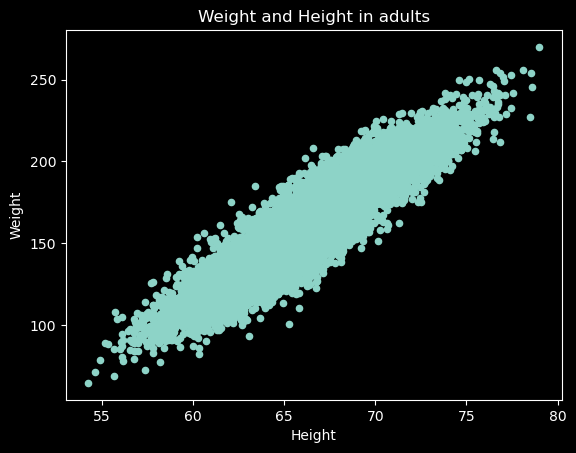

In [5]:
df.plot(kind="scatter", x="Height", y="Weight", title="Weight and Height in adults")

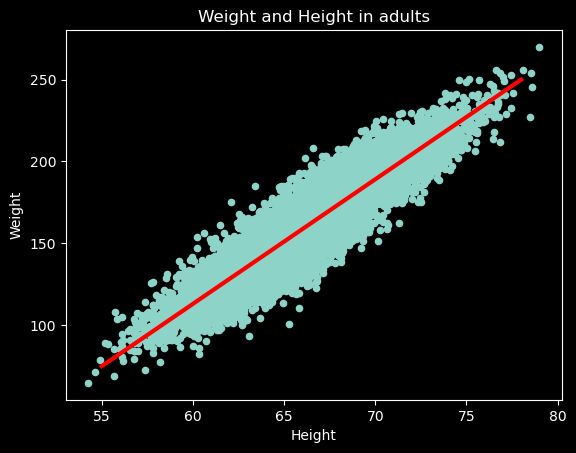

In [6]:
df.plot(kind="scatter", x="Height", y="Weight", title="Weight and Height in adults")

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color="red", linewidth=3)

In [7]:
def line(x, w=0, b=0):
    return x * w + b

In [8]:
x = np.linspace(55, 80, 100)

In [9]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [10]:
yhat = line(x, w=0, b=0)

In [11]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

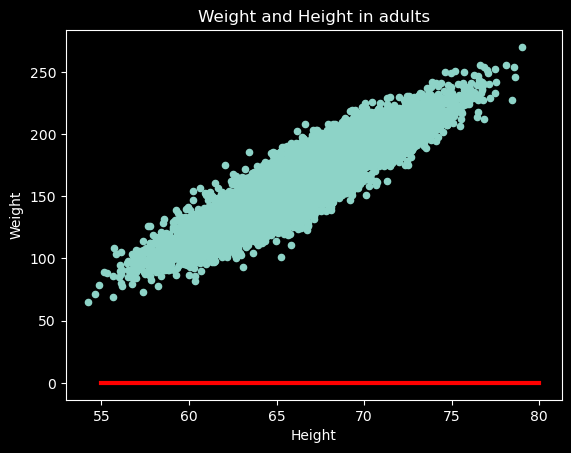

In [12]:
df.plot(kind="scatter", x="Height", y="Weight", title="Weight and Height in adults")
plt.plot(x, yhat, color="red", linewidth=3)

### Cost Function


In [13]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred) ** 2
    return s.mean()

In [14]:
X = df[["Height"]].values
y_true = df["Weight"].values

In [15]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [16]:
y_pred = line(X)

In [17]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [18]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost change.


162.52392488232755

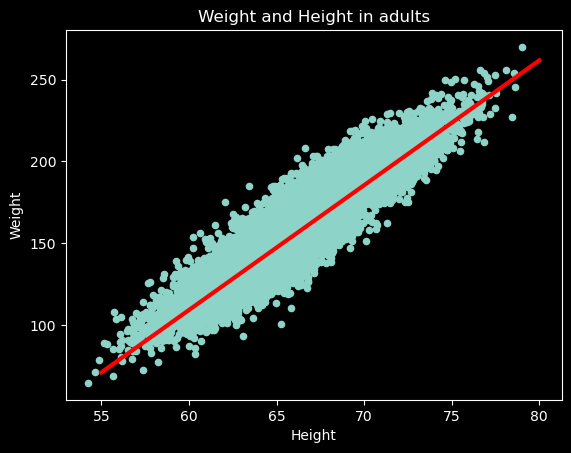

In [19]:
yhat = line(x, w=7.626382, b=-348.32452)
df.plot(kind="scatter", x="Height", y="Weight", title="Weight and Height in adults")
plt.plot(x, yhat, color="red", linewidth=3)
X = df[["Height"]].values
y_true = df["Weight"].values
y_pred = line(X, w=7.626382, b=-348.32452)
mean_squared_error(y_true, y_pred.ravel())

Text(0.5, 0, 'b')

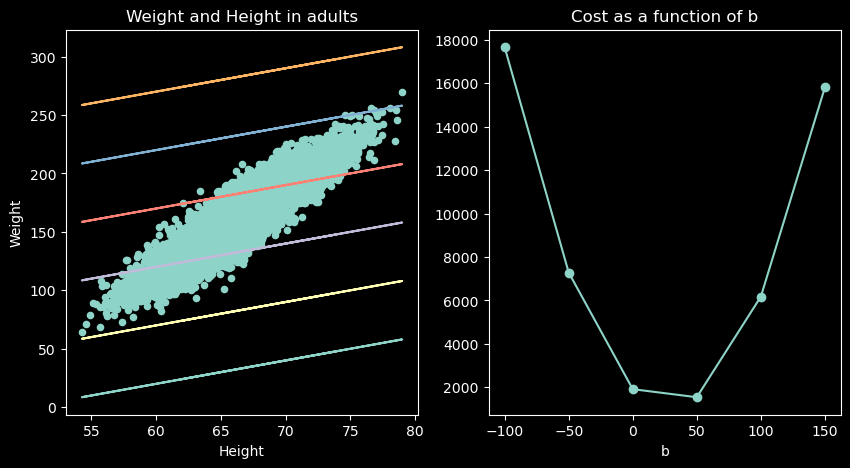

In [20]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind="scatter", x="Height", y="Weight", title="Weight and Height in adults", ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, "o-")
plt.title("Cost as a function of b")
plt.xlabel("b")

## Linear Regression with Keras


In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers.legacy import Adam, SGD
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [22]:
model = Sequential()

In [23]:
model.add(Dense(1, input_shape=(1,)))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(Adam(learning_rate=0.8), "mean_squared_error")

In [26]:
model.fit(X, y_true, epochs=40, verbose=0)

In [27]:
y_pred = model.predict(X)

  1/313 [..............................] - ETA: 1:08

313/313 [==============================] - 1s 4ms/step


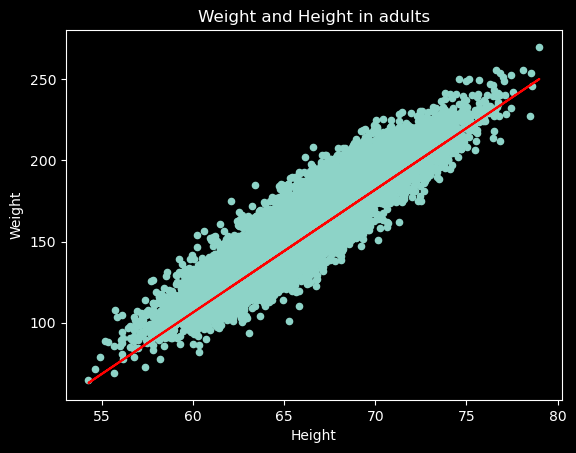

In [28]:
df.plot(kind="scatter", x="Height", y="Weight", title="Weight and Height in adults")
plt.plot(X, y_pred, color="red")

In [29]:
W, B = model.get_weights()

In [30]:
W

array([[7.571386]], dtype=float32)

In [31]:
B

array([-347.9224], dtype=float32)

## Evaluating Model Performance


In [32]:
from sklearn.metrics import r2_score

In [33]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.809


### Train Test Split


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)

In [36]:
len(X_train)

8000

In [37]:
len(X_test)

2000

In [38]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [39]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [40]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

 26/250 [==>...........................] - ETA: 1s

63/63 [==============================] - 0s 3ms/step


In [41]:
from sklearn.metrics import mean_squared_error as mse

In [42]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	221.0
The Mean Squared Error on the Test set is:	224.8


In [43]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.787
The R2 score on the Test set is:	0.778


# Classification


In [44]:
df = pd.read_csv("../data/user_visit_duration.csv")

In [45]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


<Axes: xlabel='Time (min)', ylabel='Buy'>

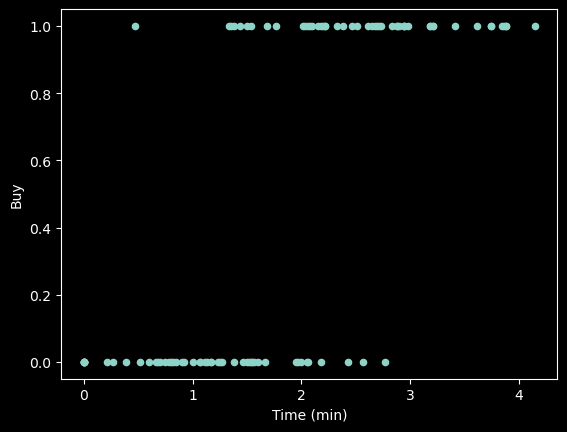

In [46]:
df.plot(kind="scatter", x="Time (min)", y="Buy")

In [47]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation="sigmoid"))

In [48]:
model.compile(SGD(learning_rate=0.5), "binary_crossentropy", metrics=["accuracy"])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
X = df[["Time (min)"]].values
y = df["Buy"].values

model.fit(X, y, epochs=25, verbose=0)

2/2 [==============================] - 0s 8ms/step


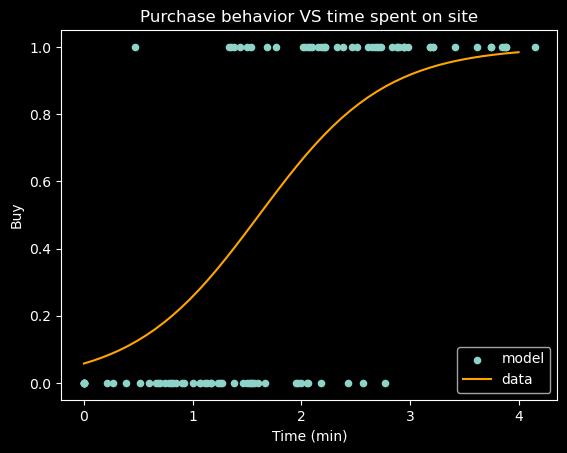

In [51]:
ax = df.plot(kind="scatter", x="Time (min)", y="Buy", title="Purchase behavior VS time spent on site")

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color="orange")
plt.legend(["model", "data"])

In [52]:
temp_class = model.predict(temp) > 0.5

2/2 [==============================] - 0s 3ms/step


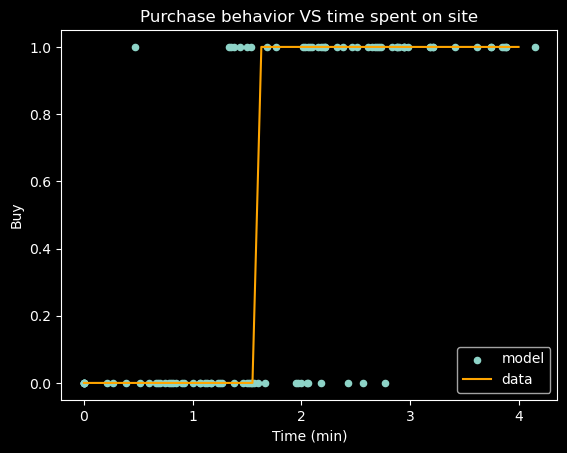

In [53]:
ax = df.plot(kind="scatter", x="Time (min)", y="Buy", title="Purchase behavior VS time spent on site")

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color="orange")
plt.legend(["model", "data"])

In [54]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

4/4 [==============================] - 0s 6ms/step


In [55]:
from sklearn.metrics import accuracy_score

In [56]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.830


### Train/Test split


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [59]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

4/4 [==============================] - 0s 2ms/step
The accuracy score is 0.500


In [60]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [61]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

3/3 [==============================] - 0s 3ms/step
The train accuracy score is 0.812
1/1 [==============================] - 0s 16ms/step
The test accuracy score is 0.850


## Cross Validation


In [64]:
from scikeras.wrappers import KerasClassifier

In [66]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation="sigmoid"))
    model.compile(SGD(learning_rate=0.5), "binary_crossentropy", metrics=["accuracy"])
    return model

In [67]:
model = KerasClassifier(model=build_logistic_regression_model, epochs=25, verbose=0)

In [68]:
from sklearn.model_selection import cross_val_score, KFold

In [69]:
cv = KFold(3, shuffle=True)

In [70]:
scores = cross_val_score(model, X, y, cv=cv)

In [71]:
scores

array([0.73529412, 0.72727273, 0.81818182])

In [72]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7602 ± 0.0411


## Confusion Matrix


In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(y, y_class_pred)

array([[40, 10],
       [ 7, 43]])

In [75]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ["Predicted " + l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [76]:
pretty_confusion_matrix(y, y_class_pred, ["Not Buy", "Buy"])

,Predicted Not Buy,Predicted Buy
Not Buy,40,10
Buy,7,43


In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [78]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.811
Recall:  	0.860
F1 Score:	0.835


In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        50
           1       0.81      0.86      0.83        50

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



## Feature Preprocessing


### Categorical Features


In [81]:
df = pd.read_csv("../data/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [82]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [83]:
pd.get_dummies(df["Gender"], prefix="Gender").head()

,Gender_Female,Gender_Male
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


## Feature Transformations


#### 1) Rescale with fixed factor


In [84]:
df["Height (feet)"] = df["Height"] / 12.0
df["Weight (100 lbs)"] = df["Weight"] / 100.0

In [85]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization


In [86]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df["Weight_mms"] = mms.fit_transform(df[["Weight"]])
df["Height_mms"] = mms.fit_transform(df[["Height"]])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization


In [87]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df["Weight_ss"] = ss.fit_transform(df[["Weight"]])
df["Height_ss"] = ss.fit_transform(df[["Height"]])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


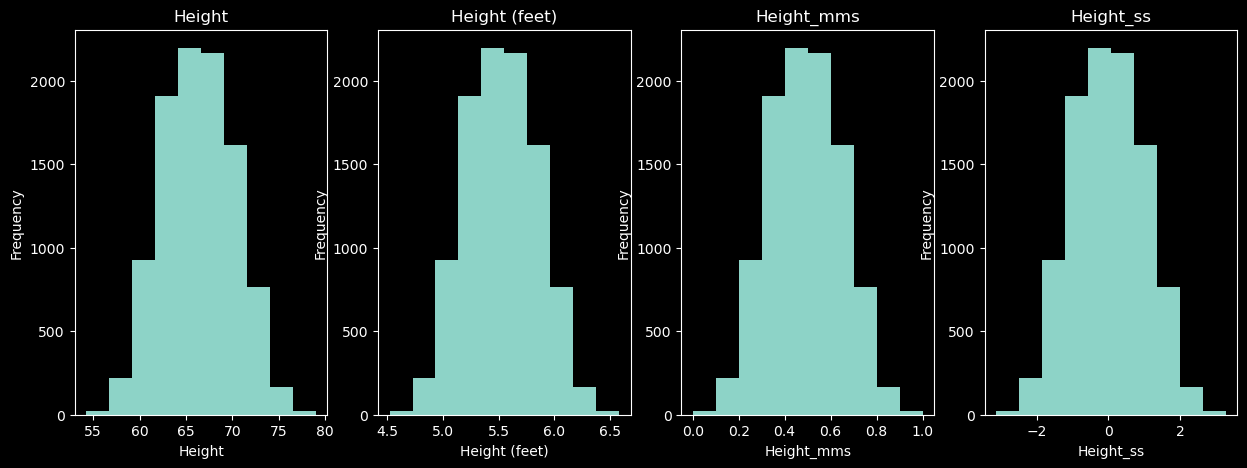

In [88]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(["Height", "Height (feet)", "Height_mms", "Height_ss"]):
    plt.subplot(1, 4, i + 1)
    df[feature].plot(kind="hist", title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises


## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv

- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
  - normalize the input features with one of the rescaling techniques mentioned above
  - use a different value for the learning rate of your model
  - use a different optimizer
- once you're satisfied with training, check the R2score on the test set


### Load the dataset ../data/housing-data.csv


In [89]:
# Load the dataset ../data/housing-data.csv
df = pd.read_csv("../data/housing-data.csv")
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


### plot the histograms for each feature


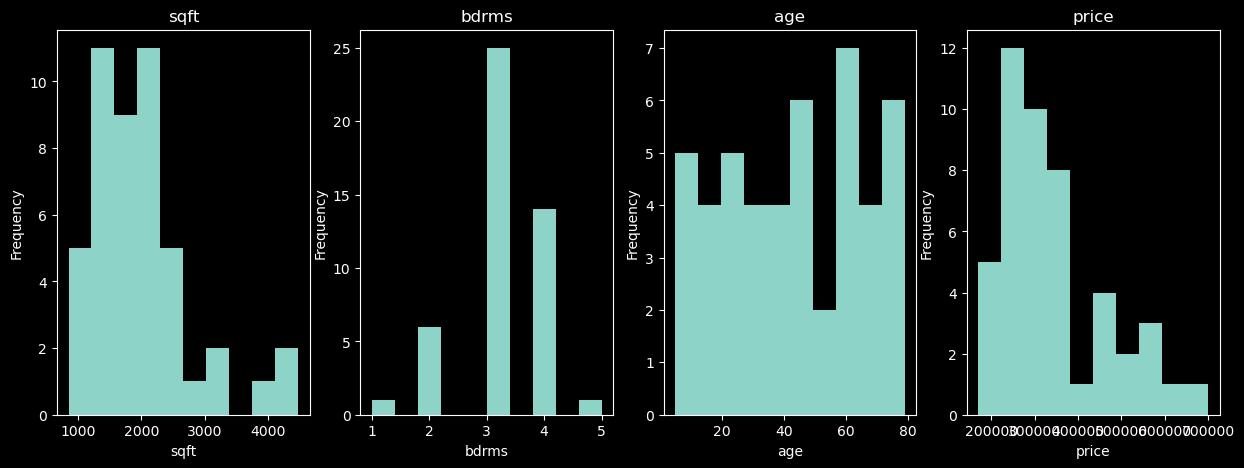

In [90]:
# plot the histograms for each feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(df.columns):
    plt.subplot(1, len(df.columns), i + 1)
    df[feature].plot(kind="hist", title=feature)
    plt.xlabel(feature)

### create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)


In [91]:
X = df.drop("price", axis=1)
y = df["price"]

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sqft    47 non-null     int64
 1   bdrms   47 non-null     int64
 2   age     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [93]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 47 entries, 0 to 46
Series name: price
Non-Null Count  Dtype
--------------  -----
47 non-null     int64
dtypes: int64(1)
memory usage: 508.0 bytes


### create a linear regression model in Keras with the appropriate number of inputs and output


In [94]:
model = Sequential()

In [95]:
model.add(Dense(1, input_shape=(3,)))

In [96]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### split the data into train and test with a 20% test size


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### train the model on the training set and check its accuracy on training and test set


In [98]:
model.compile(Adam(learning_rate=0.8), "mean_squared_error")

In [99]:
model.fit(X_train, y_train, epochs=40, verbose=0)

### how's your model doing? Is the loss growing smaller?

No.


### try to improve your model with these experiments:

- normalize the input features with one of the rescaling techniques mentioned above


In [100]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df["sqft_mms"] = mms.fit_transform(df[["sqft"]])
df["bdrms_mms"] = mms.fit_transform(df[["bdrms"]])
df["age_mms"] = mms.fit_transform(df[["age"]])

df.describe().round(2)

,sqft,bdrms,age,price,sqft_mms,bdrms_mms,age_mms
count,47.00,47.00,47.00,47.00,47.00,47.00,47.00
mean,2000.68,3.17,42.74,340412.66,0.32,0.54,0.51
std,794.70,0.76,22.87,125039.90,0.22,0.19,0.31
min,852.00,1.00,5.00,169900.00,0.00,0.00,0.00
25%,1432.00,3.00,24.50,249900.00,0.16,0.50,0.26
50%,1888.00,3.00,44.00,299900.00,0.29,0.50,0.53
75%,2269.00,4.00,61.50,384450.00,0.39,0.75,0.76
max,4478.00,5.00,79.00,699900.00,1.00,1.00,1.00


In [101]:
X_mms = df.drop(columns=["sqft", "bdrms", "age", "price"], axis=1)

In [102]:
X_mms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sqft_mms   47 non-null     float64
 1   bdrms_mms  47 non-null     float64
 2   age_mms    47 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_mms, y, test_size=0.2)

In [104]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)
model.fit(X_train, y_train, epochs=100, verbose=0)
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

1/1 [==============================] - 0s 51ms/step
The Mean Squared Error on the Train set is:	128480181272.3
The Mean Squared Error on the Test set is:	140519498545.4
The R2 score on the Train set is:	-7.251
The R2 score on the Test set is:	-9.035


### try to improve your model with these experiments:

- use a different value for the learning rate of your model


In [105]:
model.compile(Adam(learning_rate=0.1), "mean_squared_error")
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)
model.fit(X_train, y_train, epochs=100, verbose=0)
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

1/1 [==============================] - 0s 19ms/step
The Mean Squared Error on the Train set is:	128588130753.0
The Mean Squared Error on the Test set is:	140630384707.5
The R2 score on the Train set is:	-7.258
The R2 score on the Test set is:	-9.043


### try to improve your model with these experiments:

- use a different optimizer


In [106]:
model.compile(SGD(learning_rate=0.01), "mean_squared_error")
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)
model.fit(X_train, y_train, epochs=100, verbose=0)
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

1/1 [==============================] - 0s 19ms/step
The Mean Squared Error on the Train set is:	9511432442.1
The Mean Squared Error on the Test set is:	9100743700.0
The R2 score on the Train set is:	0.389
The R2 score on the Test set is:	0.350


### once you're satisfied with training, check the R2score on the test set


In [107]:
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Test set is:	0.350


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.

- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).


In [108]:
# Load the dataset ../data/HR_comma_sep.csv
df = pd.read_csv("../data/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [109]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?


In [110]:
from sklearn.metrics import accuracy_score

df["left"].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [111]:
df.left.value_counts() / len(df)

left
0    0.761917
1    0.238083
Name: count, dtype: float64

In [112]:
# accuracy score if predicted everyone stay
print(accuracy_score(df["left"], [0] * len(df)))

0.7619174611640777


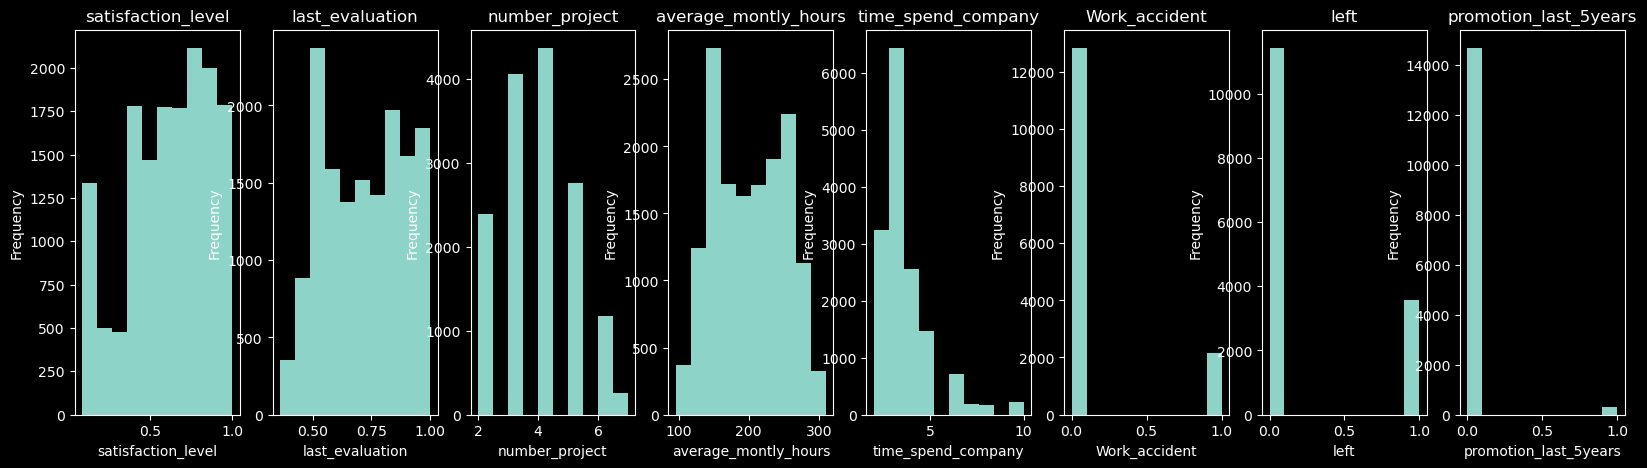

In [113]:
# plot the histograms for each feature
plt.figure(figsize=(20, 5))
for i, feature in enumerate(df.drop(columns=["sales", "salary"], axis=1).columns):
    plt.subplot(1, len(df.drop(columns=["sales", "salary"], axis=1).columns), i + 1)
    df[feature].plot(kind="hist", title=feature)
    plt.xlabel(feature)

- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.


In [114]:
ss = StandardScaler()
df["number_project_ss"] = ss.fit_transform(df[["number_project"]])
df["average_montly_hours_ss"] = ss.fit_transform(df[["average_montly_hours"]])
df.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,number_project_ss,average_montly_hours_ss
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02,0.00,-0.00
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14,1.00,1.00
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00,-1.46,-2.10
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00,-0.65,-0.90
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00,0.16,-0.02
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00,0.97,0.88
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00,2.59,2.18


In [115]:
mms = MinMaxScaler()
df["satisfaction_level_mms"] = mms.fit_transform(df[["satisfaction_level"]])
df["last_evaluation_mms"] = mms.fit_transform(df[["last_evaluation"]])
df["time_spend_company_mms"] = mms.fit_transform(df[["time_spend_company"]])
df.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,number_project_ss,average_montly_hours_ss,satisfaction_level_mms,last_evaluation_mms,time_spend_company_mms
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02,0.00,-0.00,0.57,0.56,0.19
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14,1.00,1.00,0.27,0.27,0.18
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00,-1.46,-2.10,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00,-0.65,-0.90,0.38,0.31,0.12
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00,0.16,-0.02,0.60,0.56,0.12
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00,0.97,0.88,0.80,0.80,0.25
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00,2.59,2.18,1.00,1.00,1.00


- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.


In [116]:
df_dummies = pd.get_dummies(df[["sales", "salary"]])

In [117]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False


In [118]:
X = pd.concat(
    [
        df[
            [
                "satisfaction_level_mms",
                "last_evaluation_mms",
                "number_project_ss",
                "time_spend_company_mms",
                "Work_accident",
                "promotion_last_5years",
                "average_montly_hours_ss",
            ]
        ],
        df_dummies,
    ],
    axis=1,
).values
y = df["left"].values

In [119]:
X.shape

(14999, 20)

In [120]:
X = np.asarray(X).astype("float32")

- do the usual train/test split with a 20% test size


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

- play around with learning rate and optimizer


In [122]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ["Predicted " + l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [123]:
model = Sequential()
model.add(Dense(1, input_dim=20, activation="sigmoid"))
model.compile(SGD(learning_rate=0.8), "binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)
model.fit(X_train, y_train, epochs=50, verbose=0)

- check the confusion matrix, precision and recall


In [125]:
y_pred = model.predict(X_test)
y_class_pred = np.where(y_pred > 0.5, 1, 0)
pretty_confusion_matrix(y_test, y_class_pred, ["Stay", "Leave"])

94/94 [==============================] - 0s 2ms/step


,Predicted Stay,Predicted Leave
Stay,2100,179
Leave,402,319


- First use model.predict() to extract the class probabilities

```python
y_pred = model.predict(X)
```

- Binary Classification
  Use a threshold to select the probabilities that will determine class 0 or 1

```python
np.where(y_pred > threshold, 1,0)
For example use a threshold of 0.5
```

- Mutli-class Classification
  Select the class with the highest probability

```python
np.argmax(predictions, axis=1)
```


In [126]:
y_pred = model.predict(X_test)
y_class_pred = np.where(y_pred > 0.5, 1, 0)
print("The accuracy score is {:0.3f}".format(accuracy_score(y_test, y_class_pred)))

94/94 [==============================] - 0s 2ms/step
The accuracy score is 0.806


In [127]:
print(classification_report(y_test, y_class_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2279
           1       0.64      0.44      0.52       721

    accuracy                           0.81      3000
   macro avg       0.74      0.68      0.70      3000
weighted avg       0.79      0.81      0.79      3000



- play around with learning rate and optimizer


In [128]:
# check if you still get the same results if you use a 5-Fold cross validation on all the data


def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation="sigmoid"))
    model.compile(SGD(learning_rate=0.8), "binary_crossentropy", metrics=["accuracy"])
    return model


model = KerasClassifier(model=build_logistic_regression_model, epochs=50, verbose=0)

In [129]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7855 ± 0.0142


In [130]:
scores

array([0.78166667, 0.79933333, 0.804     , 0.76633333, 0.77592531])